# 3
## 3.4

In [30]:
# List 3-1
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [31]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [32]:
train_labels[0]

1

In [33]:
max([max(sequence) for sequence in train_data])

9999

In [34]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [35]:
# List 3-2

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## 3.4.3

In [36]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [37]:
# List 3-3

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
# List 3-4, 3-5, 3-6

from tensorflow.keras import optimizers
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

## 3.4.4

In [39]:
# List 3-7

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
# List 3-8

history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 112us/sample - loss: 0.5501 - acc: 0.7639 - val_loss: 0.4336 - val_acc: 0.8443
Epoch 2/20
15000/15000 [==============================] - 1s 90us/sample - loss: 0.3411 - acc: 0.8985 - val_loss: 0.3255 - val_acc: 0.8809
Epoch 3/20
15000/15000 [==============================] - 1s 91us/sample - loss: 0.2473 - acc: 0.9203 - val_loss: 0.2869 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 1s 92us/sample - loss: 0.1942 - acc: 0.9390 - val_loss: 0.2784 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.1560 - acc: 0.9511 - val_loss: 0.2812 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 1s 92us/sample - loss: 0.1287 - acc: 0.9614 - val_loss: 0.2866 - val_acc: 0.8877
Epoch 7/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.1084 - acc: 0.9673 - val_loss: 0

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

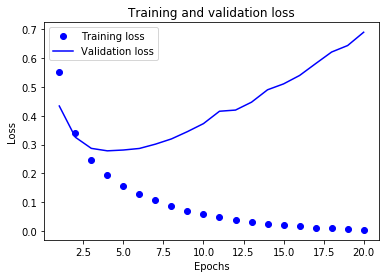

In [42]:
# List 3-9

%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

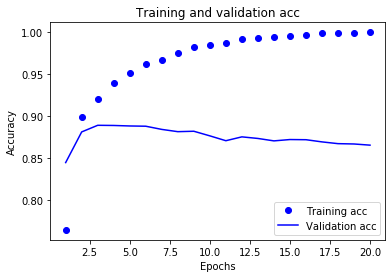

In [43]:
# List 3-10

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
# List 3-11

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.4736 - acc: 0.8126
Epoch 2/4
25000/25000 [==============================] - 2s 60us/sample - loss: 0.2727 - acc: 0.9070
Epoch 3/4
25000/25000 [==============================] - 1s 56us/sample - loss: 0.2086 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 1s 55us/sample - loss: 0.2894 - acc: 0.8866


In [45]:
results

[0.2894216592502594, 0.8866]

## 3.4.5

In [46]:
model.predict(x_test)

array([[0.20741239],
       [0.99994874],
       [0.91411555],
       ...,
       [0.12558615],
       [0.09802687],
       [0.53737164]], dtype=float32)

## 3.4.6
### 隠れ層が1つ

In [47]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 69us/sample - loss: 0.4429 - acc: 0.8296
Epoch 2/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.2725 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.2165 - acc: 0.9251
Epoch 4/4
25000/25000 [==============================] - 1s 42us/sample - loss: 0.2803 - acc: 0.8879


[0.28031058109283447, 0.88792]

In [48]:
model.predict(x_test)

array([[0.27239537],
       [0.9998666 ],
       [0.9317384 ],
       ...,
       [0.13428006],
       [0.10370916],
       [0.5521645 ]], dtype=float32)

### 隠れ層が3つ

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 55us/sample - loss: 0.4623 - acc: 0.8105
Epoch 2/4
25000/25000 [==============================] - 1s 50us/sample - loss: 0.2568 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 1s 58us/sample - loss: 0.1969 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 1s 44us/sample - loss: 0.3101 - acc: 0.8814


[0.31012113344192505, 0.88136]

In [50]:
model.predict(x_test)

array([[0.19256034],
       [0.99997115],
       [0.9603909 ],
       ...,
       [0.16079208],
       [0.05579305],
       [0.8090266 ]], dtype=float32)

### 隠れユニット数が 32

In [51]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.4132 - acc: 0.8303
Epoch 2/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.2359 - acc: 0.9129
Epoch 3/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.1897 - acc: 0.9288
Epoch 4/4
25000/25000 [==============================] - 1s 48us/sample - loss: 0.3142 - acc: 0.8782


[0.3142234696435928, 0.8782]

In [52]:
model.predict(x_test)

array([[0.15279722],
       [0.9998436 ],
       [0.9572463 ],
       ...,
       [0.1446203 ],
       [0.05239522],
       [0.7954103 ]], dtype=float32)

### 隠れユニット数が 64

In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.4221 - acc: 0.8111
Epoch 2/4
25000/25000 [==============================] - 2s 73us/sample - loss: 0.2398 - acc: 0.9076
Epoch 3/4
25000/25000 [==============================] - 2s 69us/sample - loss: 0.1823 - acc: 0.9309
Epoch 4/4
25000/25000 [==============================] - 1s 58us/sample - loss: 0.3204 - acc: 0.8782


[0.3203755322265625, 0.87816]

In [54]:
model.predict(x_test)

array([[0.1325045 ],
       [0.9999777 ],
       [0.96676743],
       ...,
       [0.10792911],
       [0.03388426],
       [0.7642392 ]], dtype=float32)

### 損失関数を binary_crossentropy から mse に変更する

In [55]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.1473 - acc: 0.8158
Epoch 2/4
25000/25000 [==============================] - 2s 62us/sample - loss: 0.0789 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 2s 62us/sample - loss: 0.0594 - acc: 0.9310
Epoch 4/4
25000/25000 [==============================] - 1s 45us/sample - loss: 0.0879 - acc: 0.8807


[0.08792784685492516, 0.88072]

In [56]:
model.predict(x_test)

array([[0.15050262],
       [0.9974321 ],
       [0.69350654],
       ...,
       [0.17632416],
       [0.08842811],
       [0.59360605]], dtype=float32)

### 活性化関数を reru から tanh に変更する

In [57]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.4279 - acc: 0.8310
Epoch 2/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.2366 - acc: 0.9158
Epoch 3/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.1792 - acc: 0.9345
Epoch 4/4
25000/25000 [==============================] - 1s 48us/sample - loss: 0.3264 - acc: 0.8757


[0.3263957339334488, 0.87568]

In [58]:
model.predict(x_test)

array([[0.08200735],
       [0.99794686],
       [0.5933471 ],
       ...,
       [0.09494427],
       [0.03287753],
       [0.66478705]], dtype=float32)